## Stereonets

Geoscientists usually work with lines, planes and their angular relationships. Studying these relationships requires some techniques to put real 3D features into simple 2D visualizations. We don't always need to design super complex 3D models just to figure out the angle between two planes, right? 

This is why the **Stereographic Projections** and the **Stereonets** became so important to geologists. This projection is fast and efficient when we just want to analyze angular relationships. It does not preserve distances or areas of the features that are projected in it, just angles.

For todays examples I will assume you already understand how a stereonet works and are familiar with (strike and dip / plunge and bearing / poles and planes) measurements. If you want to keep reading about stereonets: [A Blog Post](https://petragogy.org/stereonets/), [A Lab About Stereonets](http://maps.unomaha.edu/maher/geol3300/lab/lab5.html).

---

In Python, stereonet are veeery simple to do thanks to Joe Kington (a geologist!). Joe created a stereonet module for matplotlib called [mplstereonet](https://github.com/joferkington/mplstereonet). We are going to explore this in this tutorial. 

Some extra info, from the the [mplstereonet readme](https://github.com/joferkington/mplstereonet):

> mplstereonet provides lower-hemisphere equal-area and equal-angle stereonets for matplotlib.
> 
> All planar measurements are expected to follow the right-hand-rule to indicate dip direction. As an example, 315/30S would be 135/30 follwing the right-hand rule.
>
> mplstereonet also provides a few different methods of producing contoured orientation density diagrams.
> 
> mplstereonet also includes a number of utilities to parse structural measurements in either quadrant or azimuth form such that they follow the right-hand-rule.






In [1]:
import numpy as np
import mplstereonet
import matplotlib.pyplot as plt

%matplotlib inline

Let's say that we have measured one bedding, 010 / 30, and one fault, 315 / 78. We want to project both onto a stereonet:

In [2]:
strike1, dip1 = 010, 30
strike2, dip2 = 315, 78

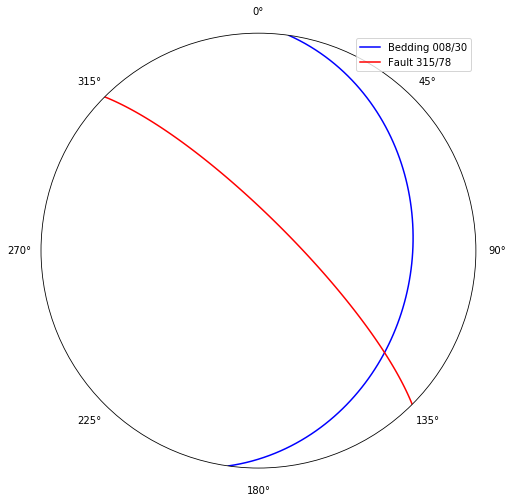

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(strike1, dip1, c='b', label='Bedding %03d/%02d' % (strike1, dip1))
ax.plane(strike2, dip2, c='r', label='Fault %03d/%02d' % (strike2, dip2))
ax.legend()

Now for some reason we want to find the intersection of the bedding and the fault, which is a linear feature, as plunge and bearing, and plot it:

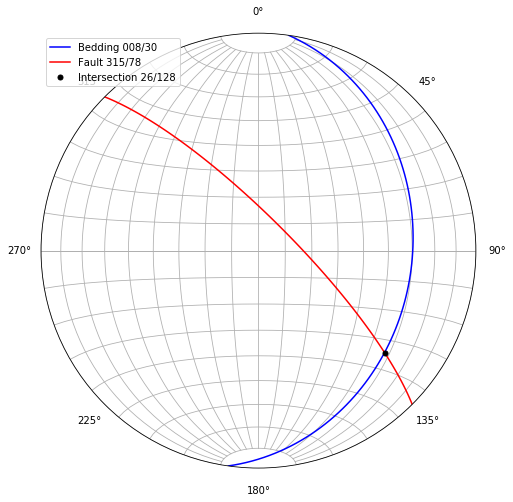

In [4]:
plunge, bearing = mplstereonet.plane_intersection(strike1, dip1, strike2, dip2)
ax.line(plunge, bearing, 'ko', markersize=5, 
        label='Intersection %02d/%03d' % (plunge, bearing))
ax.legend()
# We can also add a grid
ax.grid()
fig

## Detecting a Fold Axis using mplstereonet

Let's skip for a little more complex, but common problem for structural geologists. (This problem is ilustrated in [RAGAN, 2009, Chapter 18](https://scholar.google.com/scholar?oi=gsb40&q=ragan%202009&lookup=0&hl=en))

Say we have a collection of plane measurements made on the limb of the fold and we want to find the attitude of the fold axis:

In [5]:
fold_measurements = '''
    N 88 E, 16 N
    N 68 E, 30 NW
    N 60 E, 45 NW
    N 41 E, 50 SE
    N 35 E, 35 SE
    N 20 E, 20 E
'''

One liner to transform the text above to tuples of `strikes` and `dips` using the Right Hand Rule (go ahead and break this code into peaces):

In [6]:
strikes, dips = zip(*[mplstereonet.parse_strike_dip(*s.strip().split(', ')) 
                      for s in fold_measurements.split('\n') if s])

strikes, dips

((268.0, 248.0, 240.0, 41.0, 35.0, 20.0), (16.0, 30.0, 45.0, 50.0, 35.0, 20.0))

There is two ways to solve this problem using stereonets, from [RAGAN, 2009, Chapter 18](https://scholar.google.com/scholar?oi=gsb40&q=ragan%202009&lookup=0&hl=en):

> Methods:
> 1. Beta diagram: plot each measured plane as a great circular arc. These intersect at a point called the β axis.
> 2. S-pole diagram (also called a π diagram): plot the poles of the measured planes. These define a great circle whose pole is the β axis

Both can be solved with the `fit_girdle` method, description:

> Fits a plane to a scatter of points on a stereonet (a.k.a. a "girdle").

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


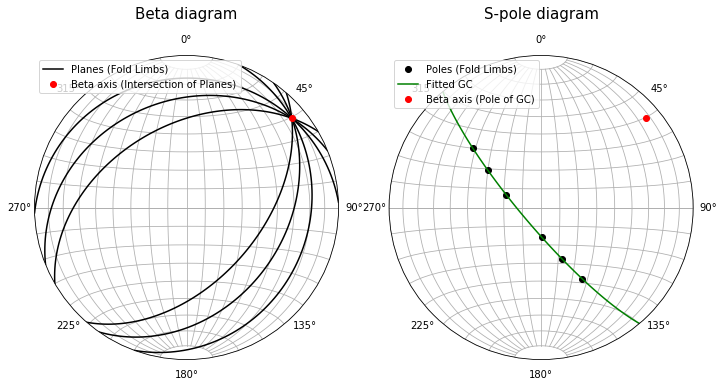

In [7]:
from collections import OrderedDict

fig = plt.figure(figsize=(10,5))

# Method 1

ax = fig.add_subplot(121, projection='stereonet')
ax.plane(strikes, dips, c='k', label='Planes (Fold Limbs)')
strike, dip = mplstereonet.fit_girdle(strikes, dips)
ax.pole(strike, dip, c='r', label='Beta axis (Intersection of Planes)')

# Method 2

ax = fig.add_subplot(122, projection='stereonet')
ax.pole(strikes, dips, c='k', label='Poles (Fold Limbs)')
ax.plane(strike, dip, c='g', label='Fitted GC')
ax.pole(strike, dip, c='r', label='Beta axis (Pole of GC)')

for ax, title in zip(fig.axes[1::2], ['Beta diagram', 'S-pole diagram']):
    ax.set_title(title, y=1.10, fontsize=15)
    ax.grid()
    
    # This will avoid repetition in the legend:
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    
    ax.legend(by_label.values(), by_label.keys(), loc='upper left')
    
fig.tight_layout()

Go ahead and explore the [examples](https://github.com/joferkington/mplstereonet/tree/master/examples) in the mplstereonet repository.

## Rose diagrams

A **Rose Diagram** shows the distributions of directional data. It is useful to analyze fault systems.
I will create some random data of fault measurements and let's analyze it using a rose diagram.

In [15]:
import numpy as np
import mplstereonet
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
strikes = np.concatenate([np.random.randint(0, 360, 60),
                          np.random.randint(10, 60, 20),
                          np.random.randint(190, 300, 20),
                          np.random.randint(60, 90, 20),
                         ])

dips = np.concatenate([np.random.randint(0, 90, 60),
                       np.random.randint(60, 90, 60),
                         ])

Calculate the number of directions (strikes) every 10° using `numpy.histogram`.

In [17]:
bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)

Sum the last value with the first value.

In [18]:
number_of_strikes[0] += number_of_strikes[-1]

Sum the first half 0-180° with the second half 180-360° to achieve the "mirrored behavior" of Rose Diagrams.

In [19]:
half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

Create the rose diagram.

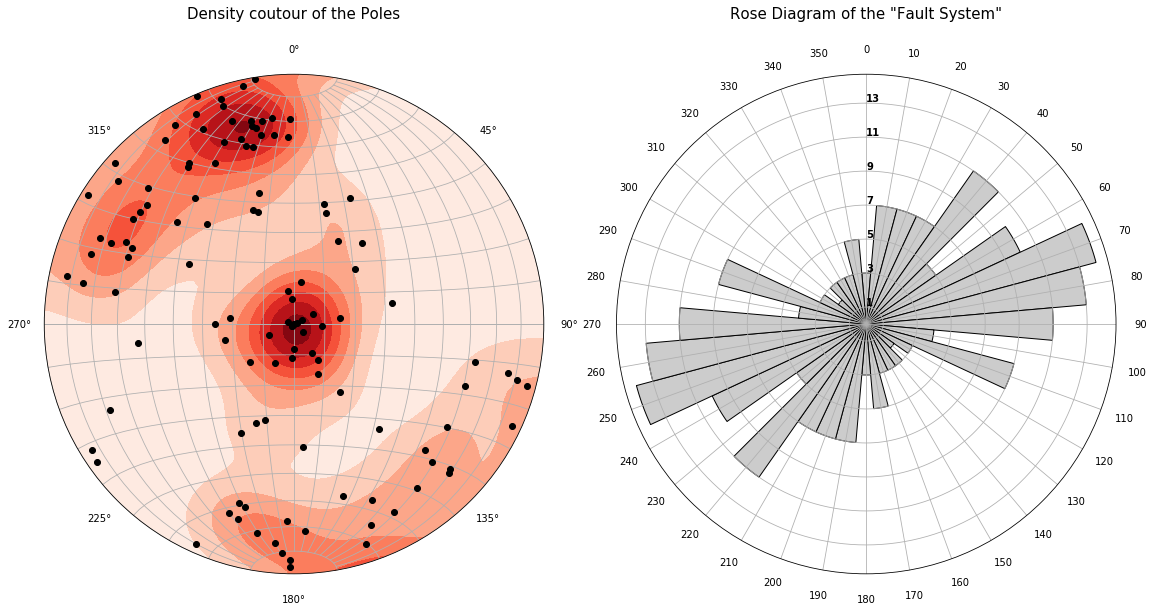

In [20]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(121, projection='stereonet')

ax.pole(strikes, dips, c='k', label='Pole of the Planes')
ax.density_contourf(strikes, dips, measurement='poles', cmap='Reds')
ax.set_title('Density coutour of the Poles', y=1.10, fontsize=15)
ax.grid()

ax = fig.add_subplot(122, projection='polar')

ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Rose Diagram of the "Fault System"', y=1.10, fontsize=15)

fig.tight_layout()

~~~
The abundance of information in the last code is due to the manipulation of the angles and grids.
~~~